In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
# Load the datasets from the assignment_1_data folder
path = "assignment_1_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
graphs = [nx.read_gml(path + f) for f in files]

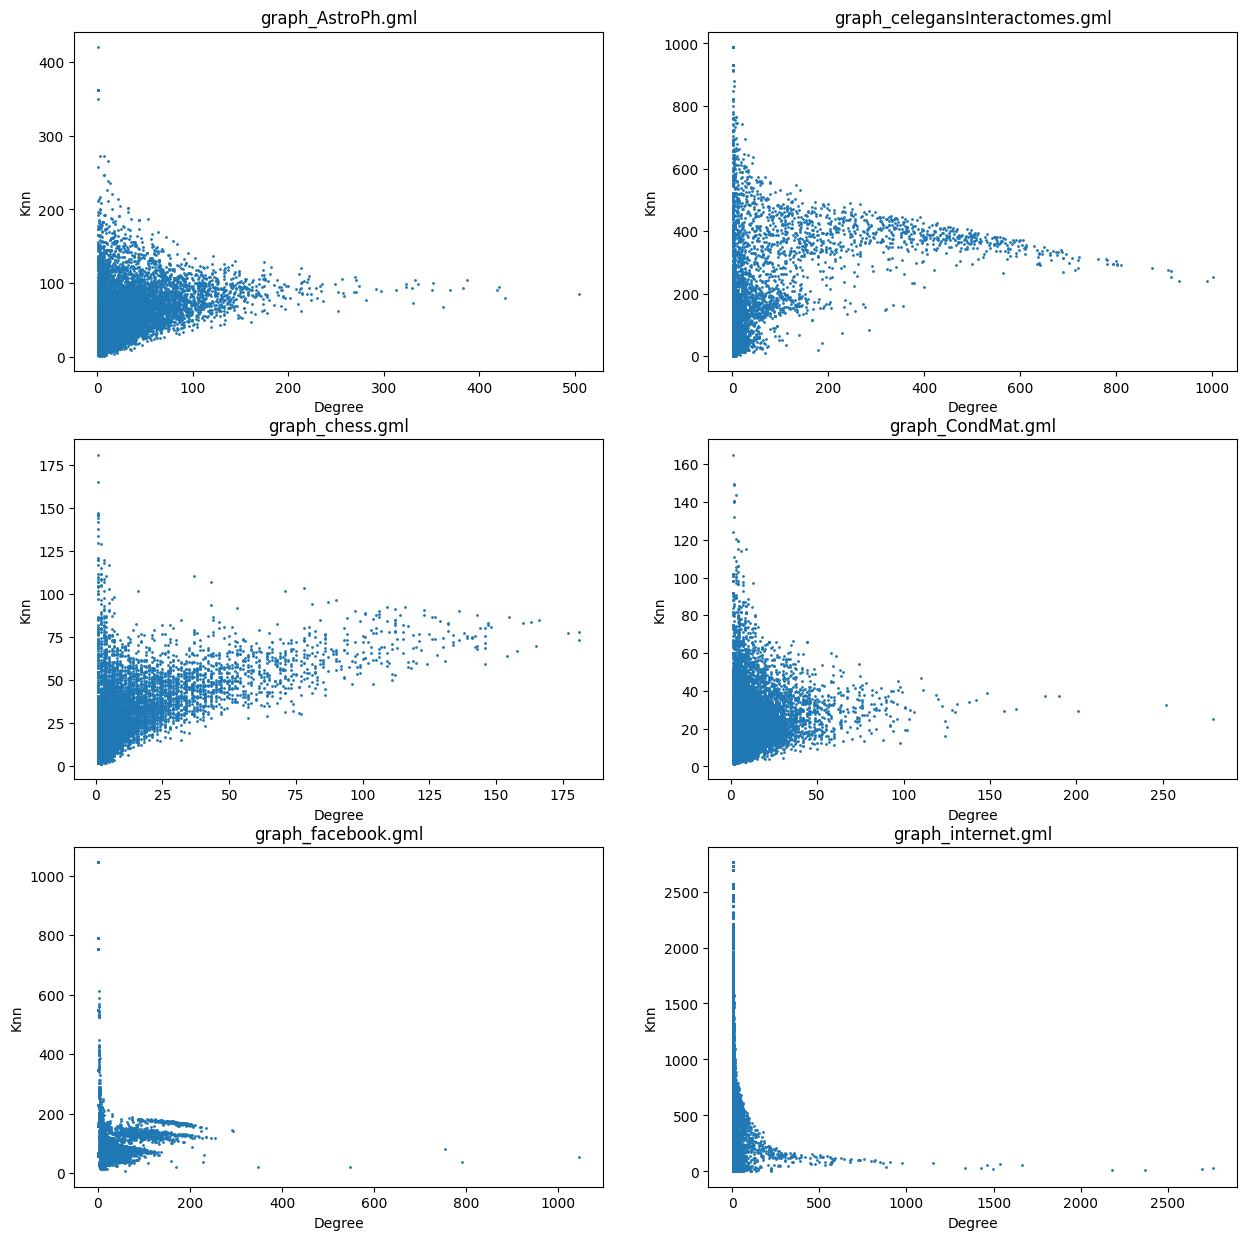

In [6]:
# Plot the average degree of the nearest neighbours knn as a function of the vertices degree.

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for G in graphs:
    knn = nx.average_neighbor_degree(G)
    degree = nx.degree(G)
    knn_values = []
    degree_values = []
    for i in knn:
        knn_values.append(knn[i])
    for node, deg in degree:
        degree_values.append(deg)
    axs[graphs.index(G) // 2, graphs.index(G) % 2].set_title(files[graphs.index(G)])
    axs[graphs.index(G) // 2, graphs.index(G) % 2].set_xlabel("Degree")
    axs[graphs.index(G) // 2, graphs.index(G) % 2].set_ylabel("Knn")
    axs[graphs.index(G) // 2, graphs.index(G) % 2].scatter(degree_values, knn_values, s=1)

In [7]:
randomised_graphs = [nx.algorithms.smallworld.random_reference(G=G, niter=1, connectivity=False, seed=1337) for G in graphs]

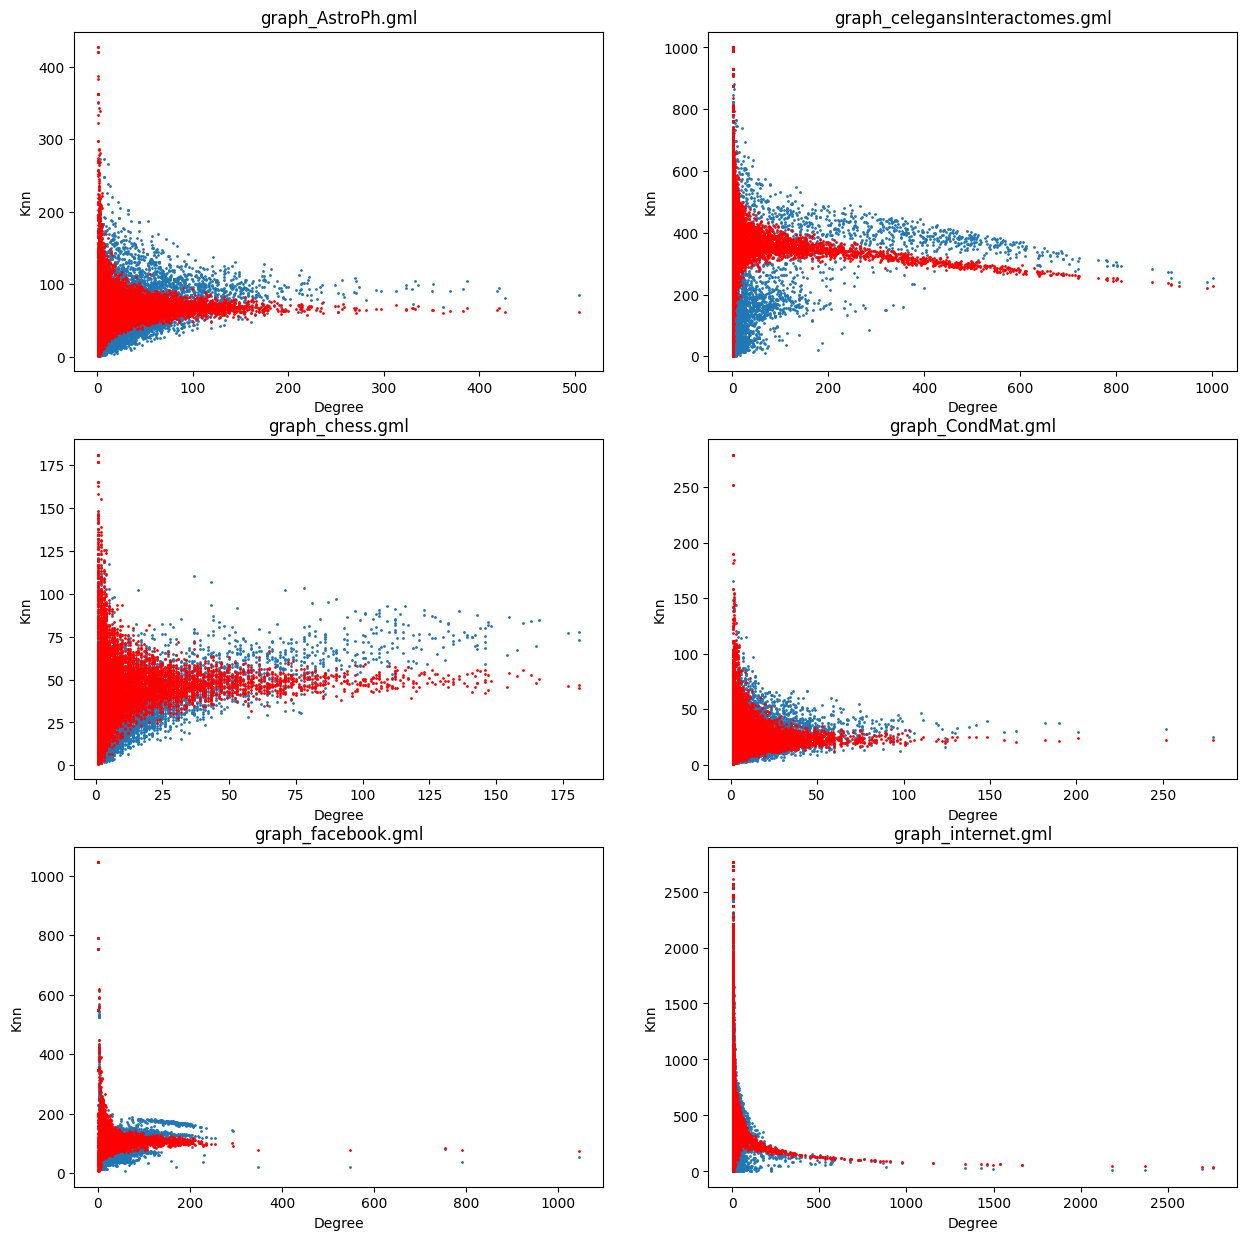

In [11]:
# Super impose the same quantity for the randomised network.

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for G in graphs:
    knn = nx.average_neighbor_degree(G)
    degree = nx.degree(G)
    knn_values = []
    degree_values = []
    for i in knn:
        knn_values.append(knn[i])
    for node, deg in degree:
        degree_values.append(deg)
    axs[graphs.index(G) // 2, graphs.index(G) % 2].set_title(files[graphs.index(G)])
    axs[graphs.index(G) // 2, graphs.index(G) % 2].set_xlabel("Degree")
    axs[graphs.index(G) // 2, graphs.index(G) % 2].set_ylabel("Knn")
    axs[graphs.index(G) // 2, graphs.index(G) % 2].scatter(degree_values, knn_values, s=1)

for G in randomised_graphs:
    knn = nx.average_neighbor_degree(G)
    degree = nx.degree(G)
    knn_values = []
    degree_values = []
    for i in knn:
        knn_values.append(knn[i])
    for node, deg in degree:
        degree_values.append(deg)
    axs[randomised_graphs.index(G) // 2, randomised_graphs.index(G) % 2].scatter(degree_values, knn_values, s=1, c="red")

In [12]:
# Compute the assortativity coefficient of the real network.

for G in graphs:
    print(files[graphs.index(G)], nx.degree_assortativity_coefficient(G))

graph_AstroPh.gml 0.20131706127372678
graph_celegansInteractomes.gml 0.15169796960230705
graph_chess.gml 0.3705153782729769
graph_CondMat.gml 0.12528250398544855
graph_facebook.gml 0.06357722918564943
graph_internet.gml -0.21486656615730235


In [13]:
# Compute the assortativity coefficient of the randomised network.

for G in randomised_graphs:
    print(files[randomised_graphs.index(G)], nx.degree_assortativity_coefficient(G))

graph_AstroPh.gml 0.015050986885547598
graph_celegansInteractomes.gml -0.1649191520967521
graph_chess.gml 0.03280648757499584
graph_CondMat.gml 0.011944671033287715
graph_facebook.gml -0.03381494674063358
graph_internet.gml -0.19740696471310343
